(lgm-intro-notebook)=
# Curve di crescita latente 

In [1]:
source("_common.R")
suppressPackageStartupMessages({
    library("lavaan")
    library("semPlot")
    library("knitr")
    library("markdown")
    library("patchwork")
    library("psych")
    library("DT")
    library("kableExtra")
    library("lme4")
})

set.seed(12345)

Negli ultimi decenni sono state sviluppate varie estensioni del framework SEM per i dati longitudinali o per misure ripetute (McArdle, 2009). Le tecniche più tradizionali (ad esempio ANOVA a misure ripetute) raramente sono adattate alla complessa struttura degli errori dei dati longitudinali, trascurano le differenze individuali e non sono sviluppate esplicitamente per testare le previsioni che derivano da ipotesi causali su un intero insieme di variabili contemporaneamente. Il framework SEM longitudinale, che risulta strettamente associato ai modelli misti (Bernal-Rusiel et al., 2013; Rovine e Molenaar, 2001), è così flessibile che molte procedure statistiche comuni come i test t, le regressioni e le analisi per misure ripetute di tipo (M)ANOVA possono essere considerate come casi speciali di modelli SEM longitudinali (Voelkle, 2007). Esempi di SEM longitudinale includono i growth curve models, i latent change score models, i growth mixture models, i latent class growth curve modelling e i continuous time models  (Driver et al., 2016; McArdle, 2009).

Un importante classe di modelli SEM longitudinali è quella dei modelli delle curve di crescita latente (*latent growth models*, LGM) che vengono utilizzati per analizzare dati longitudinali in cui una misura di esito viene ottenuta in diversi momenti del tempo e si vuole studiare il cambiamento nel tempo. 

{cite:t}`grimm2016growth` elencano cinque motivi per usare i modelli LGM.

1. l’identificazione diretta del cambiamento (e della stabilità) intra-individuale. Misurare lo stesso individuo ripetutamente consente ai ricercatori di identificare se e come specifici attributi dell’individuo sono cambiati (o rimasti gli stessi) nel tempo. Le teorie dello sviluppo (e altre) del cambiamento spesso concettualizzano e descrivono il cambiamento come un processo incrementale o trasformazionale. Il cambiamento incrementale viene osservato e identificato come un cambiamento nella grandezza (quantitativa) dello stesso costrutto lungo un continuum durante un intervallo di tempo specifico. Il cambiamento trasformazionale viene osservato e identificato come un cambiamento o una transizione tra stati discreti durante un intervallo di tempo specifico (ad esempio, la teoria dello sviluppo a stadi di Piaget; Piaget, 1952). Analiticamente, l’obiettivo principale è ottenere una descrizione parsimoniosa e accurata di come e quando gli attributi dell’individuo cambiano nel tempo. È importante notare che la stabilità e la costanza nel tempo sono casi speciali di cambiamento intra-individuale.
2. Una volta identificato il modello di cambiamento intra-individuale (all’interno della persona) (in termini di grandezza o passaggi transformazionali), una domanda logica successiva da porre è se diversi individui cambiano in modi diversi. Pertanto, il secondo motivo per la ricerca longitudinale è l’identificazione delle differenze interindividuali (o similitudine) nel cambiamento intra-individuale. Ci poniamo le seguenti domande: i diversi individui cambiano in quantità diverse o in direzioni diverse? o i diversi individui passano da uno stadio all’altro in momenti diversi? 
3. Riconoscendo che il cambiamento raramente si verifica in isolamento, il terzo motivo per la ricerca longitudinale è l’analisi delle interrelazioni nel cambiamento comportamentale. Questo approccio si basa sull’idea che vi sono cambiamenti simultaneanei e/o sequenziali in più costrutti. Analiticamente, il compito richiede l’analisi simultanea di più variabili e la valutazione di come i cambiamenti in una variabile precedano, covarino e/o seguano i cambiamenti in un’altra variabile.
4. Il quarto motivo, l’analisi delle cause (determinanti) del cambiamento intra-individuale, si concentra sulla spiegazione o sulla contabilizzazione del processo di cambiamento osservato all’interno della persona. In particolare, l’obiettivo è identificare i fattori e/o i meccanismi variabili nel tempo che influenzano e/o guidano i cambiamenti intra-individuali identificati nel Motivo 1. Si assume che i cambiamenti sono probabilmente destinati a procedere a ritmi diversi in periodi di tempo diversi. Ad esempio, quando si impara una nuova abilità, i cambiamenti intra-individuali possono procedere rapidamente all’inizio, ma più lentamente in seguito quando gli individui raggiungono livelli asintotici di performance.
5. Il quinto motivo per la ricerca longitudinale è l’analisi delle cause (determinanti) delle differenze interindividuali nel cambiamento intra-individuale. Dato che gli individui differiscono nel modo in cui cambiano nel tempo (Motivo 2), i ricercatori sono spesso interessati a identificare i fattori e/o i meccanismi che possono spiegare queste differenze tra le persone. L’obiettivo è identificare le variabili invarianti nel tempo che sono correlate a specifici aspetti del cambiamento all’interno della persona. Ad esempio, le caratteristiche demografiche/di background, le manipolazioni sperimentali (ad esempio, gli interventi) e le caratteristiche dei contesti prossimali e distali degli individui possono influenzare come e quando il cambiamento procede. Le domande di ricerca derivanti dal Motivo 5 sono spesso esaminate attraverso l’inclusione di covariate invarianti nel tempo.

Insieme, questi cinque motivi per la ricerca longitudinale forniscono la base per costruire domande di ricerca precise che possono essere esaminate utilizzando modelli di crescita contemporanei. Quando si pensa agli studi longitudinali, è sempre possibile fare riferimento a questi 5 punti. Qual è la tua teoria del cambiamento intra-individuale? Qual è la tua teoria delle differenze tra le persone? e così via. Puoi quindi selezionare modelli specifici che sono appropriati per quelle domande e puoi considerare attentamente se e come i dati consentono e/o limitano la tua capacità di ottenere risposte accurate.

I cinque motivi per la ricerca longitudinale forniscono una solida base per creare domande di ricerca precise che possono essere esaminate utilizzando modelli di crescita contemporanei. Quando si affrontano gli studi longitudinali, si possono considerare questi cinque punti chiave. Ad esempio, si potrebbero porre domande come: Qual è la teoria del cambiamento intra-individuale? Qual è la teoria delle differenze tra le persone? In base alle domande poste, è possibile scegliere modelli specifici appropriati e valutare come i dati possano aiutare o limitare la capacità di ottenere risposte accurate.

## Preliminari

I modelli di crescita sono tipicamente applicati a dati ottenuti da studi in cui sono state ottenute diverse misure ripetute da più individui. Un problema comune nella ricerca psicologica che richiede la modellizzazione a variabili latenti è lo studio di come le persone differiscono nei loro sentimenti, pensieri e comportamenti nel tempo e nello spazio. L’obiettivo non è solo determinare se le persone differiscono, ma anche capire se queste differenze sono sistematiche e come descriverle al meglio. L’analisi potrebbe esaminare i pattern di affetto o comportamento nel tempo, come le persone differiscono nelle risposte emotive in funzione della situazione o come cambiano le relazioni tra coppie di variabili nel tempo.

Tradizionalmente, gli studi longitudinali erano progettati in modo tale che il numero di valutazioni ripetute fosse relativamente basso (cioè <8) e il numero di individui fosse relativamente elevato (cioè >200). Tuttavia, i progressi sia nelle considerazioni teoriche del cambiamento (ad esempio, la non linearità) sia nella tecnologia per la raccolta dei dati (ad esempio, sondaggi basati sul web, smartphone) hanno notevolmente ampliato le possibilità di raccolta e analisi dei dati longitudinali: {cite:t}`grimm2016growth` discutono applicazioni di modelli di crescita a dati longitudinali ottenuti fino a 50.000 persone e fino a 1.000 valutazioni ripetute.

Questa complessità richiede che il ricercatore sia ben versato in (1) la manipolazione delle strutture dei dati longitudinali (ad esempio, il ridimensionamento dei dati dal formato wide al formato long), (2) la rappresentazione grafica dei dati longitudinali e (3) lo screening dei dati longitudinali.

### Strutture dei dati

I dati longitudinali tipicamente si presentano in due forme: long e wide. Nel formato long, la descrizione del tempo è sulle righe; nel formato wide le variabili relative ad ogni occasione temporale sono organizzate in colonne. 

È possibile trasformere i dati dal formato long in formato wide e viceversa usando le funzioni R `pivot_wider()` e `pivot_longer()`. La sintassi è spiegata nella pagina web [tidyr](https://tidyr.tidyverse.org/reference/pivot_wider.html).

### Visualizzazione di dati longitudinali

Come in qualsiasi analisi statistica, è importante esaminare attentamente i dati. Ciò include la produzione di sia riepiloghi quantitativi che visualizzazioni. Per fare un esempio di visualizzazione di dati longitudinali, esaminiamo il cambiamento nel rendimento in matematica dei bambini durante la scuola elementare e media utilizzando il set di dati NLSY-CYA [i dati sono presentati nel capitolo 3 del libro di {cite:t}`grimm2016growth`].

Iniziamo a leggere i dati.

In [2]:
# set filepath for data file
filepath <- "https://raw.githubusercontent.com/LRI-2/Data/main/GrowthModeling/nlsy_math_long_R.dat"
# read in the text data file using the url() function
dat <- read.table(
  file = url(filepath),
  na.strings = "."
) # indicates the missing data designator
# copy data with new name
nlsy_math_long <- dat

# Add names the columns of the data set
names(nlsy_math_long) <- c(
  "id", "female", "lb_wght",
  "anti_k1", "math", "grade",
  "occ", "age", "men",
  "spring", "anti"
)

# view the first few observations in the data set
head(nlsy_math_long)

,id,female,lb_wght,anti_k1,math,grade,occ,age,men,spring,anti
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,201,1,0,0,38,3,2,111,0,1,0
2,201,1,0,0,55,5,3,135,1,1,0
3,303,1,0,1,26,2,2,121,0,1,2
4,303,1,0,1,33,5,3,145,0,1,2
5,2702,0,0,0,56,2,2,100,NA,1,0
6,2702,0,0,0,58,4,3,125,NA,1,2


Le traiettorie di cambiamento intra-individuale possono essere prodotte nel modo seguente.

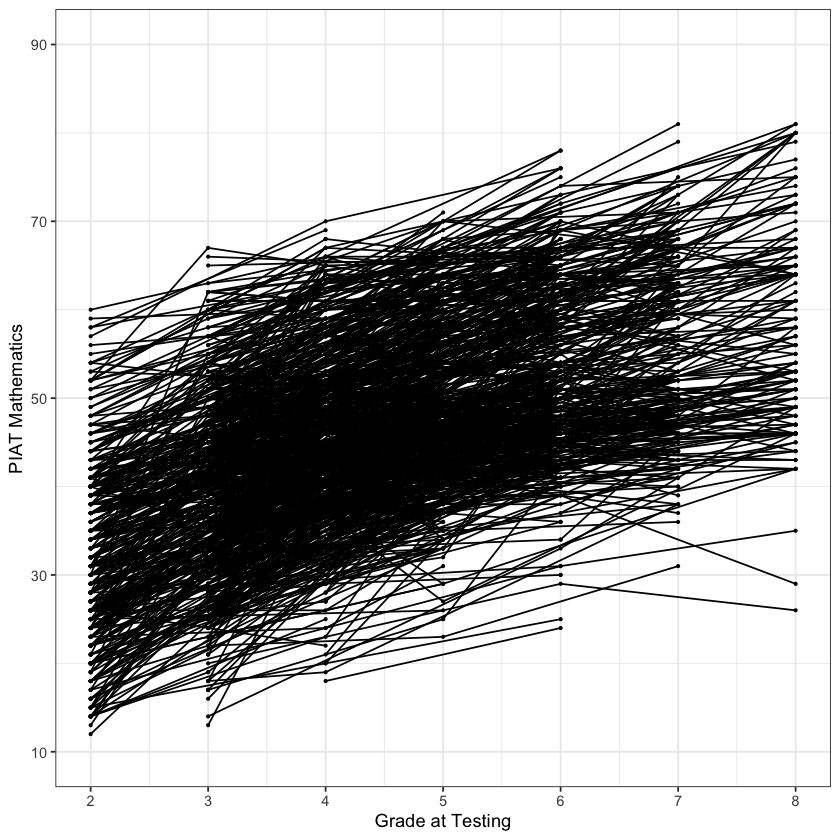

In [3]:
nlsy_math_long |> # data set
  ggplot(aes(x = grade, y = math, group = id)) + # setting variables
  geom_point(size = .5) + # adding points to plot
  geom_line() + # adding lines to plot
  theme_bw() + # changing style/background
  # setting the x-axis with breaks and labels
  scale_x_continuous(
    limits = c(2, 8),
    breaks = c(2, 3, 4, 5, 6, 7, 8),
    name = "Grade at Testing"
  ) +
  # setting the y-axis with limits breaks and labels
  scale_y_continuous(
    limits = c(10, 90),
    breaks = c(10, 30, 50, 70, 90),
    name = "PIAT Mathematics"
  )

### Data screening

Prima di adattare i modelli di crescita, è importante esaminare i dati e ottenere informazioni di base sulle variabili da utilizzare nell’analisi. La selezione preliminare dovrebbe includere l'esame della distribuzione dei punteggi per ogni variabile. Come al solito, le principali statistiche descrittive univariate includono la media, la mediana, la varianza (deviazione standard), l’asimmetria, la curtosi, il minimo, il massimo, l’intervallo e il numero di osservazioni per ogni variabile in base alla metrica del tempo scelta. Le statistiche descrittive bivariate includono correlazioni/covarianze e tabelle di frequenza bivariate per variabili nominali o ordinali. Tutte queste statistiche possono essere esaminate per individuare schemi e relazioni non lineari, così come potenziali valori anomali e codici errati. 

I dati longitudinali sono speciali perché sono ordinati, il che può essere indicizzato lungo una o più metriche del tempo (variabili come occasione di misurazione, età, data, tempo dall’evento, numero di esposizioni, ecc.). Ad esempio, è immediatamente informativo esaminare come la media, la varianza e il numero di casi disponibili cambiano attraverso le misure ripetute (ad esempio wght5, wght6, wght7). Si noti che la selezione della metrica del tempo influenza notevolmente come i risultati di qualsiasi modello di crescita specifico possono essere interpretati. Pertanto, nella fase di selezione dei dati è importante considerare come varie proprietà dei dati longitudinali differiscano quando i dati sono organizzati in relazione a diverse metriche del tempo. 

Per i dati dell'esempio, le statistiche descrittive possono essere ottenute nel modo seguente.

In [4]:
describe(nlsy_math_long)

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
id,1,2221,5.284491e+05,3.273037e+05,497403,5.154669e+05,384144.6252,201,1256601,1256400,0.30258128,-0.8968290,6.945070e+03
female,2,2221,4.934714e-01,5.000700e-01,0,4.918402e-01,0.0000,0,1,1,0.02609895,-2.0002188,1.061100e-02
lb_wght,3,2221,7.969383e-02,2.708796e-01,0,0.000000e+00,0.0000,0,1,1,3.10187193,7.6250432,5.747805e-03
anti_k1,4,2221,1.416929e+00,1.497133e+00,1,1.194147e+00,1.4826,0,8,8,1.14091473,1.1448077,3.176772e-02
math,5,2221,4.611977e+01,1.279992e+01,46,4.621666e+01,11.8608,12,81,69,-0.03406619,-0.1808447,2.716020e-01
grade,6,2221,4.512382e+00,1.769220e+00,4,4.435566e+00,1.4826,2,8,6,0.25689681,-0.9232006,3.754115e-02
occ,7,2221,2.841063e+00,7.886855e-01,3,2.774902e+00,1.4826,2,5,3,0.54731500,-0.4754854,1.673515e-02
age,8,2221,1.269032e+02,2.206059e+01,126,1.262802e+02,25.2042,82,175,93,0.18672163,-0.9115950,4.681044e-01
men,9,1074,1.945996e-01,3.960766e-01,0,1.186047e-01,0.0000,0,1,1,1.54069191,0.3740825,1.208585e-02


Esaminiamo le statistiche descrittive bivariate.

In [5]:
cor(nlsy_math_long, use='pairwise.complete.obs') |> 
  round(2)

,id,female,lb_wght,anti_k1,math,grade,occ,age,men,spring,anti
id,1.00,-0.01,-0.01,-0.02,-0.22,-0.01,0.01,-0.01,-0.02,-0.11,0.01
female,-0.01,1.00,0.06,-0.09,-0.05,0.00,-0.02,-0.04,0.02,0.04,-0.07
lb_wght,-0.01,0.06,1.00,0.03,-0.03,-0.02,-0.03,0.01,0.04,0.03,0.02
anti_k1,-0.02,-0.09,0.03,1.00,-0.08,-0.03,-0.04,-0.01,0.01,-0.01,0.52
math,-0.22,-0.05,-0.03,-0.08,1.00,0.59,0.53,0.58,0.30,0.29,-0.05
grade,-0.01,0.00,-0.02,-0.03,0.59,1.00,0.87,0.95,0.62,0.12,0.04
occ,0.01,-0.02,-0.03,-0.04,0.53,0.87,1.00,0.86,0.57,0.17,0.04
age,-0.01,-0.04,0.01,-0.01,0.58,0.95,0.86,1.00,0.64,0.21,0.06
men,-0.02,0.02,0.04,0.01,0.30,0.62,0.57,0.64,1.00,0.16,0.13
spring,-0.11,0.04,0.03,-0.01,0.29,0.12,0.17,0.21,0.16,1.00,-0.01


### Attendibilità

Come in tutte le analisi, i ricercatori dovrebbero esaminare l’affidabilità dei loro strumenti di misurazione.

### Invarianza di misurazione

Quando si lavora con dati di misure ripetute, la comparabilità dei punteggi tra le occasioni di misurazione richiede un certo livello di invarianza di misurazione. Lo strumento di misurazione misura lo stesso costrutto nella stessa metrica in ogni occasione? Formalmente, l’invarianza di misurazione garantisce che i punteggi siano confrontabili sia tra le persone che tra le occasioni di misurazione. Ad esempio, l’invarianza di misurazione tra le misure ripetute del peso degli individui è facilitata dall’uso dello stesso dispositivo di misurazione (bilancia) ogni anno, a condizione che la bilancia sia tarata nello stesso modo ogni anno. Se la bilancia è tarata in modo diverso in occasioni diverse o se vengono utilizzate unità di misura diverse, i punteggi risultanti non possono essere confrontati quantitativamente: lo strumento di misurazione è non invariante. Quando si lavora con dispositivi fisici, l’invarianza di misurazione viene testata e garantita attraverso la taratura. Quando si lavora con scale psicologiche, l’invarianza di misurazione viene o assunta (il che non ideale) o testata utilizzando modelli di misurazione formali.



